## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  1.402014  1.410292  0.182582  1.304941  1.211424  0.858245
1  1.651138  0.144555  0.272542  0.482389  1.246775  1.294589
2 -1.486836  0.121507 -0.928012 -0.432048 -1.459894 -1.379641
3 -0.216409  0.827985  1.502639 -1.191095  0.670588  0.528737
4  0.426528  0.265787  0.704686  0.982154  1.033991  1.454915


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9785495	total: 58.1ms	remaining: 58.1s
1:	learn: 0.9698730	total: 58.7ms	remaining: 29.3s
2:	learn: 0.9606551	total: 59.2ms	remaining: 19.7s
3:	learn: 0.9495726	total: 59.8ms	remaining: 14.9s
4:	learn: 0.9405887	total: 60.2ms	remaining: 12s
5:	learn: 0.9316467	total: 60.7ms	remaining: 10.1s
6:	learn: 0.9207080	total: 61.3ms	remaining: 8.69s
7:	learn: 0.9097898	total: 61.7ms	remaining: 7.65s
8:	learn: 0.9004041	total: 62.1ms	remaining: 6.84s
9:	learn: 0.8913677	total: 62.6ms	remaining: 6.2s
10:	learn: 0.8837500	total: 63.2ms	remaining: 5.68s
11:	learn: 0.8732929	total: 63.7ms	remaining: 5.25s
12:	learn: 0.8653947	total: 64.3ms	remaining: 4.88s
13:	learn: 0.8554820	total: 65ms	remaining: 4.58s
14:	learn: 0.8477101	total: 65.4ms	remaining: 4.3s
15:	learn: 0.8402966	total: 65.8ms	remaining: 4.05s
16:	learn: 0.8324581	total: 66.4ms	remaining: 3.84s
17:	learn: 0.8252770	total: 66.8ms	remaining: 3.64s
18:	learn: 0.8189050	total: 67.3ms	remaining: 3.48

106:	learn: 0.3823402	total: 108ms	remaining: 898ms
107:	learn: 0.3797161	total: 108ms	remaining: 893ms
108:	learn: 0.3770295	total: 109ms	remaining: 888ms
109:	learn: 0.3742563	total: 109ms	remaining: 884ms
110:	learn: 0.3719385	total: 110ms	remaining: 879ms
111:	learn: 0.3687358	total: 110ms	remaining: 873ms
112:	learn: 0.3662604	total: 111ms	remaining: 868ms
113:	learn: 0.3639710	total: 111ms	remaining: 864ms
114:	learn: 0.3610645	total: 112ms	remaining: 859ms
115:	learn: 0.3584618	total: 112ms	remaining: 855ms
116:	learn: 0.3556219	total: 113ms	remaining: 849ms
117:	learn: 0.3533156	total: 113ms	remaining: 845ms
118:	learn: 0.3512244	total: 113ms	remaining: 840ms
119:	learn: 0.3482289	total: 114ms	remaining: 836ms
120:	learn: 0.3454549	total: 114ms	remaining: 832ms
121:	learn: 0.3428802	total: 115ms	remaining: 828ms
122:	learn: 0.3407295	total: 115ms	remaining: 823ms
123:	learn: 0.3386300	total: 116ms	remaining: 820ms
124:	learn: 0.3364495	total: 116ms	remaining: 815ms
125:	learn: 

270:	learn: 0.1339407	total: 187ms	remaining: 503ms
271:	learn: 0.1331521	total: 188ms	remaining: 502ms
272:	learn: 0.1323404	total: 188ms	remaining: 501ms
273:	learn: 0.1314019	total: 188ms	remaining: 499ms
274:	learn: 0.1305466	total: 189ms	remaining: 498ms
275:	learn: 0.1299455	total: 189ms	remaining: 496ms
276:	learn: 0.1292413	total: 190ms	remaining: 495ms
277:	learn: 0.1284820	total: 190ms	remaining: 493ms
278:	learn: 0.1277396	total: 190ms	remaining: 492ms
279:	learn: 0.1270987	total: 191ms	remaining: 491ms
280:	learn: 0.1262286	total: 191ms	remaining: 489ms
281:	learn: 0.1254348	total: 192ms	remaining: 489ms
282:	learn: 0.1244879	total: 192ms	remaining: 487ms
283:	learn: 0.1238831	total: 193ms	remaining: 486ms
284:	learn: 0.1228163	total: 193ms	remaining: 484ms
285:	learn: 0.1219769	total: 194ms	remaining: 483ms
286:	learn: 0.1212096	total: 194ms	remaining: 482ms
287:	learn: 0.1205612	total: 195ms	remaining: 481ms
288:	learn: 0.1197574	total: 195ms	remaining: 480ms
289:	learn: 

489:	learn: 0.0425613	total: 291ms	remaining: 303ms
490:	learn: 0.0423860	total: 292ms	remaining: 303ms
491:	learn: 0.0421184	total: 293ms	remaining: 302ms
492:	learn: 0.0419733	total: 293ms	remaining: 301ms
493:	learn: 0.0417367	total: 294ms	remaining: 301ms
494:	learn: 0.0415636	total: 294ms	remaining: 300ms
495:	learn: 0.0414325	total: 295ms	remaining: 299ms
496:	learn: 0.0411752	total: 295ms	remaining: 298ms
497:	learn: 0.0410324	total: 295ms	remaining: 298ms
498:	learn: 0.0408916	total: 296ms	remaining: 297ms
499:	learn: 0.0406430	total: 296ms	remaining: 296ms
500:	learn: 0.0405045	total: 297ms	remaining: 295ms
501:	learn: 0.0403681	total: 297ms	remaining: 295ms
502:	learn: 0.0402324	total: 298ms	remaining: 294ms
503:	learn: 0.0399867	total: 298ms	remaining: 293ms
504:	learn: 0.0398534	total: 298ms	remaining: 292ms
505:	learn: 0.0397222	total: 299ms	remaining: 292ms
506:	learn: 0.0394843	total: 299ms	remaining: 291ms
507:	learn: 0.0393548	total: 300ms	remaining: 290ms
508:	learn: 

658:	learn: 0.0200957	total: 370ms	remaining: 192ms
659:	learn: 0.0199919	total: 371ms	remaining: 191ms
660:	learn: 0.0198900	total: 371ms	remaining: 190ms
661:	learn: 0.0197891	total: 372ms	remaining: 190ms
662:	learn: 0.0196899	total: 372ms	remaining: 189ms
663:	learn: 0.0195996	total: 372ms	remaining: 188ms
664:	learn: 0.0195056	total: 373ms	remaining: 188ms
665:	learn: 0.0194138	total: 373ms	remaining: 187ms
666:	learn: 0.0192974	total: 374ms	remaining: 187ms
667:	learn: 0.0192072	total: 374ms	remaining: 186ms
668:	learn: 0.0191189	total: 375ms	remaining: 185ms
669:	learn: 0.0190325	total: 375ms	remaining: 185ms
670:	learn: 0.0189629	total: 376ms	remaining: 184ms
671:	learn: 0.0188786	total: 376ms	remaining: 184ms
672:	learn: 0.0188439	total: 377ms	remaining: 183ms
673:	learn: 0.0187615	total: 377ms	remaining: 182ms
674:	learn: 0.0187061	total: 378ms	remaining: 182ms
675:	learn: 0.0186258	total: 378ms	remaining: 181ms
676:	learn: 0.0185721	total: 378ms	remaining: 181ms
677:	learn: 

875:	learn: 0.0092493	total: 474ms	remaining: 67.2ms
876:	learn: 0.0092036	total: 475ms	remaining: 66.6ms
877:	learn: 0.0091573	total: 475ms	remaining: 66.1ms
878:	learn: 0.0091171	total: 476ms	remaining: 65.5ms
879:	learn: 0.0090731	total: 476ms	remaining: 65ms
880:	learn: 0.0090286	total: 477ms	remaining: 64.4ms
881:	learn: 0.0089857	total: 477ms	remaining: 63.9ms
882:	learn: 0.0089398	total: 478ms	remaining: 63.3ms
883:	learn: 0.0088958	total: 478ms	remaining: 62.8ms
884:	learn: 0.0088579	total: 479ms	remaining: 62.2ms
885:	learn: 0.0088158	total: 479ms	remaining: 61.6ms
886:	learn: 0.0087747	total: 480ms	remaining: 61.1ms
887:	learn: 0.0087377	total: 480ms	remaining: 60.5ms
888:	learn: 0.0086960	total: 480ms	remaining: 60ms
889:	learn: 0.0086730	total: 481ms	remaining: 59.4ms
890:	learn: 0.0086551	total: 481ms	remaining: 58.9ms
891:	learn: 0.0086156	total: 482ms	remaining: 58.3ms
892:	learn: 0.0085741	total: 482ms	remaining: 57.8ms
893:	learn: 0.0085518	total: 483ms	remaining: 57.3

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

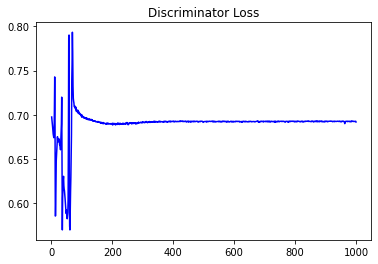

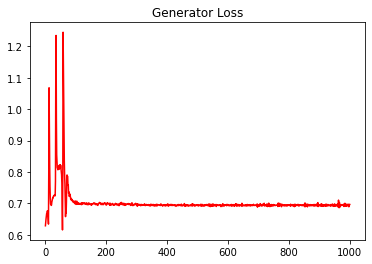

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.02141902796990923


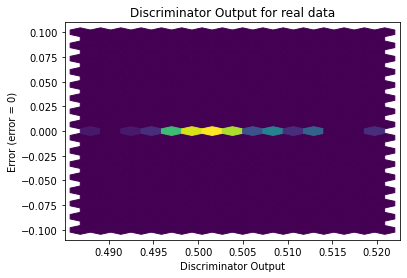

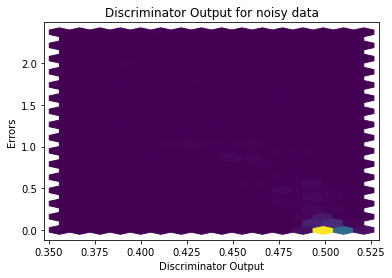

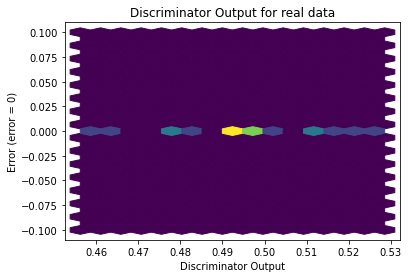

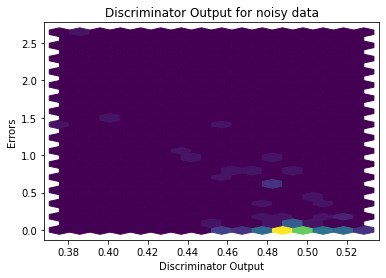

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


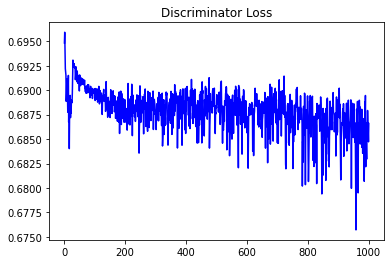

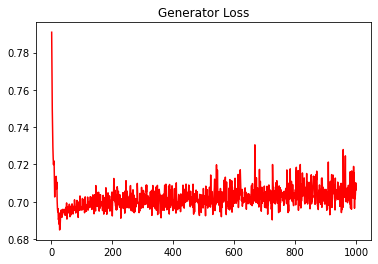

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.04258035510771337


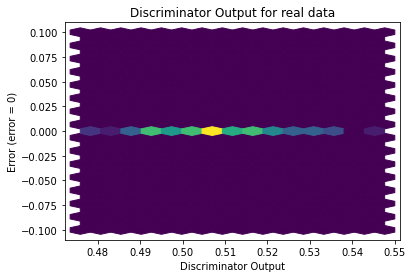

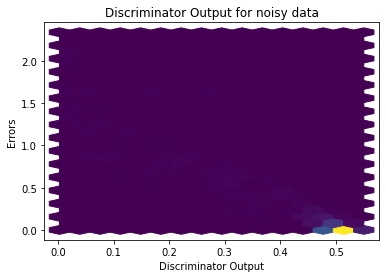

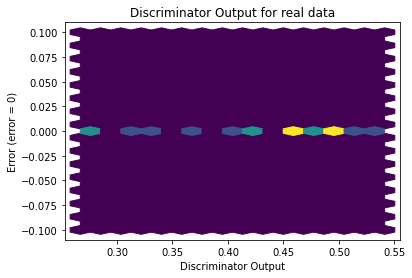

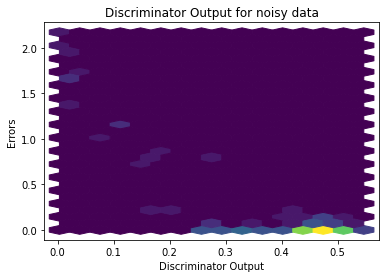

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1246]], requires_grad=True)
